## Create the NSAF atlas, a minmax version of the NSAF atlas, a heatmap and the proteinCount per tissue file

In [1]:
from __future__ import division
import mysql.connector
import pandas as pd
import numpy as np
import sqlite3
import matplotlib

In [2]:
conn = mysql.connector.connect(user='root', password='password', host='127.0.0.1', port='3306',database='expression_atlas2')
mycursor = conn.cursor()

 # check the connection,
if conn.is_connected():
    print('connection succesfull')
else:
    print('no connection')

connection succesfull


Connect to database and query tissues + tissue-assay relations

### Atlas created with healthy tissues!

In [3]:
tissuesql = """SELECT tissue_to_assay.assay_id, tissue.cell_type, tissue.tissue_name, tissue.disease_status FROM tissue_to_assay JOIN tissue ON tissue_to_assay.tissue_id = tissue.tissue_id WHERE disease_status = 'Healthy'"""
tissueData = pd.read_sql_query(tissuesql,conn)
tissueData.head()
#tissueData

,assay_id,cell_type,tissue_name,disease_status
0,13988,Brain,Brain,Healthy
1,13989,Brain,Brain,Healthy
2,13990,Brain,Brain,Healthy
3,13991,Brain,Brain,Healthy
4,13992,Brain,Brain,Healthy


Read NSAF data for each protein per assay

In [4]:
proteinData = pd.read_csv('/home/compomics/git/Tissue_specific/Summary/Datasets/Tissue/proteome_nsaf_update0806.csv')
proteinData.shape

(4850267, 3)

Map NSAF data to tissues

In [5]:
atlas = pd.merge(proteinData, tissueData, on = 'assay_id')
atlas.head(20)
#atlas

,assay_id,uniprot_id,NSAF,cell_type,tissue_name,disease_status
0,13988,A2RRP1,0.000259,Brain,Brain,Healthy
1,13988,A5YM72,0.000372,Brain,Brain,Healthy
2,13988,O00483,0.007590,Brain,Brain,Healthy
3,13988,O14495,0.000988,Brain,Brain,Healthy
4,13988,O14594,0.000931,Brain,Brain,Healthy
5,13988,O14926,0.000625,Brain,Brain,Healthy
6,13988,O15020,0.009003,Brain,Brain,Healthy
7,13988,O15230,0.001997,Brain,Brain,Healthy
8,13988,O60242,0.000202,Brain,Brain,Healthy
9,13988,O60423,0.000236,Brain,Brain,Healthy


In [10]:
np.unique(atlas['disease_status'])

array(['Healthy'], dtype=object)

In [32]:
#save to csv file,
atlas.to_csv(path_or_buf = '../Atlas_and_parser/Atlas_output/atlas_healthy_update0806.csv', index = False)

In [6]:
atlas = pd.read_csv('/home/compomics/git/Tissue_specific/Summary/Datasets/Tissue/atlas_healthy_update0806.csv')
atlas.head()

,assay_id,uniprot_id,NSAF,cell_type,tissue_name
0,13988,A2RRP1,0.000259,Brain,Brain
1,13988,A5YM72,0.000372,Brain,Brain
2,13988,O00483,0.007590,Brain,Brain
3,13988,O14495,0.000988,Brain,Brain
4,13988,O14594,0.000931,Brain,Brain


 Primary analysis of atlas. The first steps will be repeated throughout the rest of the analyses.

In [7]:
# Create a pivot table to have NSAF values for each protein over each tissue
# Replace missing data with a '0' value
tissuept = pd.pivot_table(atlas, values = 'NSAF', index = 'uniprot_id', columns = 'tissue_name').fillna(0)
tissuept

tissue_name,Adipose tissue,Adrenal gland,Anus,Appendix,B-cells,Blood,Bone,Bone marrow,Brain,Breast,...,Tooth,Trachea,Umbilical cord,Unknown,Ureter,Urinary bladder,Urine,Uterus,fallopian tube/oviduct,lymph node
uniprot_id,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1,0.000000,0.000000,0.000000,0.000000,0.000035,0.000192,0.0,0.00000,0.000339,0.000000,...,0.0,0.000000,0.000326,0.000335,0.000000,0.001118,0.000000,0.000000,0.000000,0.000000
A0A075B6H7,0.009316,0.001240,0.000467,0.000697,0.000000,0.022331,0.0,0.00084,0.000780,0.005637,...,0.0,0.000490,0.000000,0.000339,0.002205,0.000827,0.007642,0.000922,0.001344,0.000480
A0A075B6H8,0.000000,0.002633,0.000000,0.000000,0.000000,0.006593,0.0,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000367,0.000000,0.000141,0.001150,0.000000,0.000000,0.000000
A0A075B6H9,0.000406,0.001126,0.000000,0.000000,0.000000,0.004857,0.0,0.00000,0.000602,0.001298,...,0.0,0.000478,0.000000,0.000355,0.000000,0.000164,0.001346,0.000450,0.000000,0.000455
A0A075B6I0,0.000000,0.000165,0.000444,0.000663,0.000000,0.007252,0.0,0.00000,0.001672,0.000439,...,0.0,0.000932,0.000000,0.005160,0.001892,0.000348,0.002023,0.000000,0.000656,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y9,0.000000,0.000000,0.000000,0.000000,0.000000,0.001876,0.0,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000290,0.000000,0.000000,0.000364,0.000000,0.000000,0.000000,0.000000
Q9Y6Z4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000515,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q9Y6Z5,0.000000,0.000000,0.000000,0.000306,0.000000,0.000136,0.0,0.00000,0.000257,0.000000,...,0.0,0.000000,0.000000,0.000198,0.000000,0.000053,0.000514,0.000000,0.000000,0.000000


In [8]:
# minmax normalisation of NSAF values over each tissue
minmax_atlas = (tissuept - tissuept.min()) / (tissuept.max() - tissuept.min())
minmax_atlas

tissue_name,Adipose tissue,Adrenal gland,Anus,Appendix,B-cells,Blood,Bone,Bone marrow,Brain,Breast,...,Tooth,Trachea,Umbilical cord,Unknown,Ureter,Urinary bladder,Urine,Uterus,fallopian tube/oviduct,lymph node
uniprot_id,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1,0.000000,0.000000,0.000000,0.000000,0.000290,0.000358,0.0,0.000000,0.001692,0.000000,...,0.0,0.000000,0.016207,0.002811,0.000000,0.021762,0.000000,0.000000,0.000000,0.000000
A0A075B6H7,0.152785,0.042996,0.014680,0.017607,0.000000,0.041746,0.0,0.007374,0.003896,0.032576,...,0.0,0.010607,0.000000,0.002844,0.026619,0.016093,0.100739,0.021265,0.019359,0.008736
A0A075B6H8,0.000000,0.091290,0.000000,0.000000,0.000000,0.012325,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.003085,0.000000,0.002743,0.015166,0.000000,0.000000,0.000000
A0A075B6H9,0.006664,0.039026,0.000000,0.000000,0.000000,0.009080,0.0,0.000000,0.003010,0.007501,...,0.0,0.010340,0.000000,0.002980,0.000000,0.003186,0.017748,0.010366,0.000000,0.008272
A0A075B6I0,0.000000,0.005710,0.013958,0.016741,0.000000,0.013557,0.0,0.000000,0.008357,0.002539,...,0.0,0.020171,0.000000,0.043338,0.022839,0.006781,0.026667,0.000000,0.009443,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y9,0.000000,0.000000,0.000000,0.000000,0.000000,0.003507,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.014391,0.000000,0.000000,0.007078,0.000000,0.000000,0.000000,0.000000
Q9Y6Z4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.002576,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q9Y6Z5,0.000000,0.000000,0.000000,0.007734,0.000000,0.000255,0.0,0.000000,0.001285,0.000000,...,0.0,0.000000,0.000000,0.001663,0.000000,0.001027,0.006781,0.000000,0.000000,0.000000


In [10]:
cols = minmax_atlas.columns
minmax_atlas[cols] = minmax_atlas[cols].apply(pd.to_numeric, errors='coerce')
minmax_atlas.idxmax()

tissue_name
Adipose tissue            P15090
Adrenal gland             P62805
Anus                      P68871
Appendix                  P17661
B-cells                   P62805
                           ...  
Urinary bladder           P62805
Urine                     P31431
Uterus                    P62805
fallopian tube/oviduct    P68871
lymph node                P24844
Length: 69, dtype: object

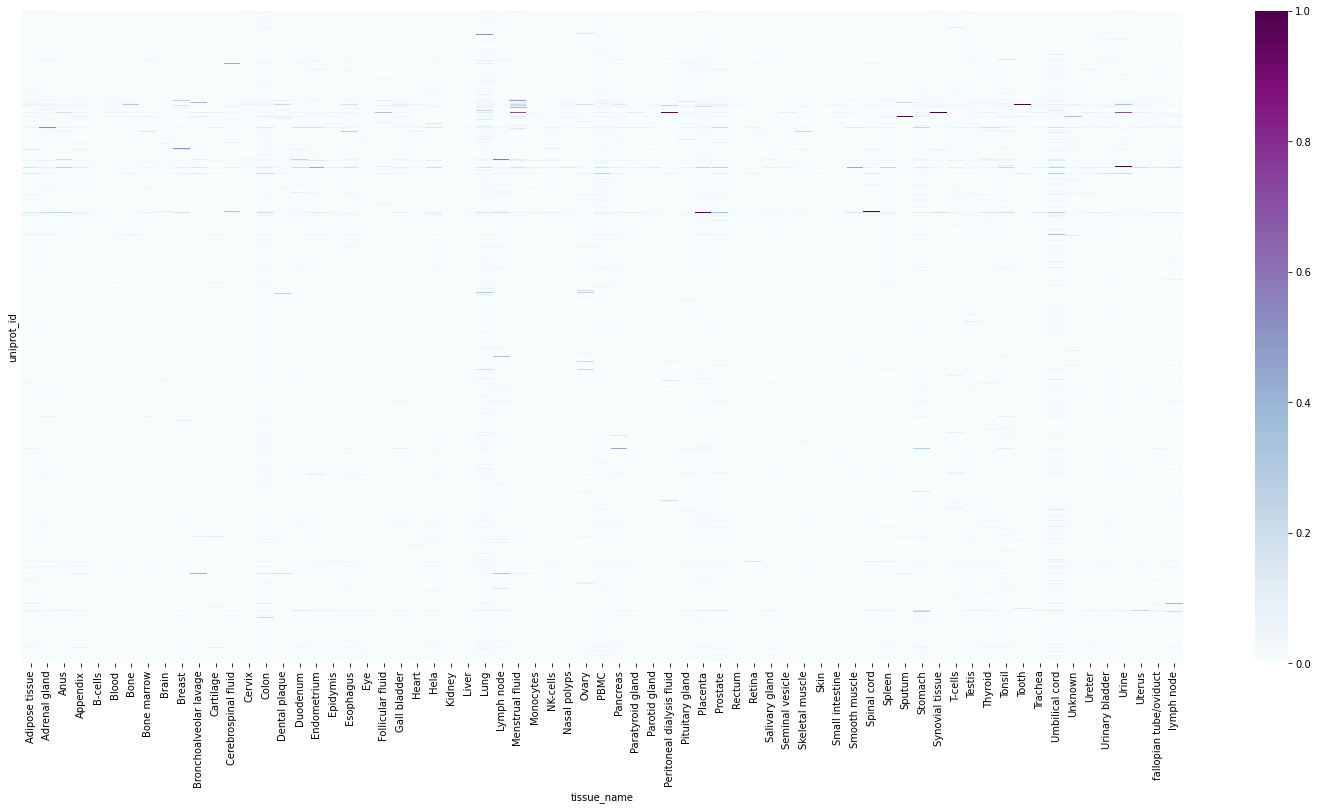

In [11]:
# plot atlas into a heatmap to look at expression patterns over each protein
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
fig, ax = plt.subplots(figsize=(26,12))
datamap = sns.heatmap(minmax_atlas, ax=ax, yticklabels = False,cmap='BuPu')
#datamap.figure.savefig('heatmap_expressionpurple0806.png')
datamap

In [18]:
#del atlas['tissue_name']
#del atlas['assay_id']

# split dataset per tissue
tissues = atlas['tissue_name'].unique()
DataFrameDict = {elem : pd.DataFrame for elem in tissues}
for key in DataFrameDict.keys():
    DataFrameDict[key] = atlas[:][atlas['tissue_name'] == key]

In [19]:
# count number of proteins for each tissue
proteinCount = {}

for key in DataFrameDict.keys():
    tissue = DataFrameDict[key].pop('tissue_name')
    grouped = DataFrameDict[key].groupby('uniprot_id').mean().reset_index()
    count = len(grouped.index)
    proteinCount[key] = str(count)

In [20]:
for key, val in proteinCount.items():
        print (key + ":" + val)

Brain:5967
Blood:4437
Adrenal gland:4740
B-cells:4949
T-cells:4928
Colon:4619
Esophagus:3012
Gall bladder:4032
Small intestine:4428
Heart:4811
Kidney:5300
Liver:6022
Lung:4879
Monocytes:4521
NK-cells:5190
Ovary:5972
Pancreas:5092
Placenta:7204
Prostate:4634
Rectum:4289
Retina:4715
Spinal cord:3561
Testis:8908
Urinary bladder:4228
Dental plaque:2173
PBMC:6468
Sputum:184
Cartilage:531
Ureter:1755
Bone:943
Skin:5787
Follicular fluid:164
Peritoneal dialysis fluid:291
Menstrual fluid:1009
Eye:613
Cerebrospinal fluid:4218
Nasal polyps:2393
Tonsil:5939
Parotid gland:2315
Cervix:2419
Skeletal muscle:4359
Tooth:213
Adipose tissue:4269
Umbilical cord:3891
Urine:1448
Appendix:2007
Bone marrow:1584
Duodenum:3783
Endometrium:3690
fallopian tube/oviduct:3192
lymph node:2234
Pituitary gland:3988
Salivary gland:3719
Smooth muscle:1452
Spleen:2950
Stomach:2748
Thyroid:2862
Anus:1325
Breast:1316
Epidymis:2000
Paratyroid gland:1019
Seminal vesicle:929
Trachea:1381
Uterus:1272


In [ ]:
# write protein counts per tissue to csv file
import csv
with open('Atlas_output/proteinCount_update0806_healthy.csv', 'w') as f:
    writer = csv.writer(f)
    for key, value in proteinCount.items():
        writer.writerow([key, value])

## Now independent of healthy status of the tissue

In [24]:
tissuesql = """SELECT tissue_to_assay.assay_id, tissue.cell_type, tissue.tissue_name FROM tissue_to_assay JOIN tissue ON tissue_to_assay.tissue_id = tissue.tissue_id """
tissueData = pd.read_sql_query(tissuesql,conn)
tissueData.head()
#tissueData
   

,assay_id,cell_type,tissue_name
0,13988,Brain,Brain
1,13989,Brain,Brain
2,13990,Brain,Brain
3,13991,Brain,Brain
4,13992,Brain,Brain


In [26]:
proteinData = pd.read_csv('../Atlas_and_parser/Atlas_output/proteome_nsaf_update0806.csv')
proteinData.shape

(4850267, 3)

In [27]:
atlas = pd.merge(proteinData, tissueData, on = 'assay_id')
atlas.head()
#atlas

,assay_id,uniprot_id,NSAF,cell_type,tissue_name
0,13988,A2RRP1,0.000259,Brain,Brain
1,13988,A5YM72,0.000372,Brain,Brain
2,13988,O00483,0.007590,Brain,Brain
3,13988,O14495,0.000988,Brain,Brain
4,13988,O14594,0.000931,Brain,Brain


In [28]:
#save to csv file,
atlas.to_csv(path_or_buf = '../Atlas_and_parser/Atlas_output/atlas_all_health_statuses_update0806.csv', index = False)


In [29]:
# split dataset per tissue
tissues = atlas['tissue_name'].unique()
DataFrameDict = {elem : pd.DataFrame for elem in tissues}
for key in DataFrameDict.keys():
    DataFrameDict[key] = atlas[:][atlas['tissue_name'] == key]

In [30]:
# count number of proteins for each tissue
proteinCount = {}

for key in DataFrameDict.keys():
    tissue = DataFrameDict[key].pop('tissue_name')
    grouped = DataFrameDict[key].groupby('uniprot_id').mean().reset_index()
    count = len(grouped.index)
    proteinCount[key] = str(count)


In [31]:
for key, val in proteinCount.items():
    print (key + ":" + val)"

SyntaxError: EOL while scanning string literal (<ipython-input-31-4a1ba833cf58>, line 2)

In [ ]:
# write protein counts per tissue to csv file
import csv
with open('Atlas_output/proteinCount_update0806_all_health_statuses.csv', 'w') as f:
    writer = csv.writer(f)
    for key, value in proteinCount.items():
        writer.writerow([key, value])